##Installing and Importing Dependencies

In [ ]:
!pip install qiskit qiskit-aer qiskit-ibm-runtime

In [19]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.visualization import plot_histogram
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## 2-Spin Heisenberg Model Implementation and Time Evolution

In [25]:
# Parameters
J = 1.0
t = Parameter('t')

#QASM simulator
simulator = AerSimulator()

# Parameterized circuit for 2 spins
qc_2spin = QuantumCircuit(2)
qc_2spin.x(0)  # Initial state |01>
qc_2spin.rxx(2 * J * t, 0, 1)
qc_2spin.ryy(2 * J * t, 0, 1)
qc_2spin.rzz(2 * J * t, 0, 1)
qc_2spin.measure_all()

# Time range
time_values = np.linspace(0, 2 * np.pi, 50)
norm_times = time_values / (np.pi / 2)

prob_01 = []
prob_10 = []

# Run for each time value
for t_val in time_values:
    bound_circuit = qc_2spin.assign_parameters({t: t_val})
    tqc = transpile(bound_circuit, simulator)
    result = simulator.run(tqc, shots=1024).result()
    counts = result.get_counts()

    total = sum(counts.values())
    prob_01.append(counts.get('01', 0) / total)
    prob_10.append(counts.get('10', 0) / total)

##3-Spin Heisenberg Model Implementation and Time Evolution

In [27]:
# Parameters
J = 1.0
t = Parameter('t')

# QASM simulator
simulator = AerSimulator()

# Build parameterized 3-spin circuit
qc_3spin = QuantumCircuit(3)
qc_3spin.x(1)  # Initial state |010⟩

# Interaction: qubits 1 and 2
qc_3spin.rxx(2 * J * t, 0, 1)
qc_3spin.ryy(2 * J * t, 0, 1)
qc_3spin.rzz(2 * J * t, 0, 1)

# Interaction: qubits 2 and 3
qc_3spin.rxx(2 * J * t, 1, 2)
qc_3spin.ryy(2 * J * t, 1, 2)
qc_3spin.rzz(2 * J * t, 1, 2)

qc_3spin.measure_all()

# Time range
time_values = np.linspace(0, 2 * np.pi, 50)
norm_times = time_values / (np.pi / 2)

# Tracking  basis states
prob_010 = []
prob_100 = []
prob_001 = []

for t_val in time_values:
    bound_circuit = qc_3spin.assign_parameters({t: t_val})
    tqc = transpile(bound_circuit, simulator)
    result = simulator.run(tqc, shots=1024).result()
    counts = result.get_counts()

    total = sum(counts.values())
    prob_010.append(counts.get('010', 0) / total)
    prob_100.append(counts.get('100', 0) / total)
    prob_001.append(counts.get('001', 0) / total)

##Time Evolution Comparison Plot

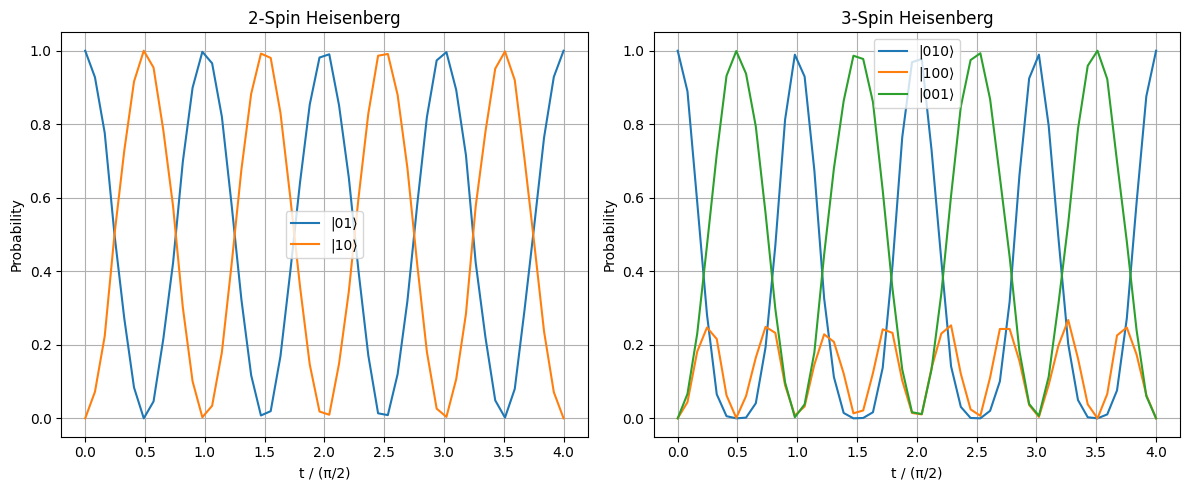

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 2-spin
axs[0].plot(norm_times, prob_01, label='|01⟩')
axs[0].plot(norm_times, prob_10, label='|10⟩')
axs[0].set_title('2-Spin Heisenberg')
axs[0].set_xlabel('t / (π/2)')
axs[0].set_ylabel('Probability')
axs[0].legend()
axs[0].grid(True)

# 3-spin
axs[1].plot(norm_times, prob_010, label='|010⟩')
axs[1].plot(norm_times, prob_100, label='|100⟩')
axs[1].plot(norm_times, prob_001, label='|001⟩')
axs[1].set_title('3-Spin Heisenberg')
axs[1].set_xlabel('t / (π/2)')
axs[1].set_ylabel('Probability')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Comparison of the 2-Spin and 3-Spin Heisenberg Model Implementations

### 1. Circuit Structure & Interaction Terms

| Feature              | 2-Spin Model                          | 3-Spin Model                                       |
|----------------------|----------------------------------------|----------------------------------------------------|
| **Number of Qubits** | 2                                      | 3                                                  |
| **Interaction Pairs**| One pair                        | Two pairs                        |
| **Gate Layers**      | 3 interaction gates (RXX, RYY, RZZ)   | 6 interaction gates (3 for each pair)              |
| **Initial State**    | \|01⟩ — spin-up on qubit 0           | \|010⟩ — spin-up on the middle qubit              |

---

### 2. Physical Interpretation

- **2-Spin System**  
  The 2-spin Heisenberg model simulates **direct exchange** between two neighboring spins.  
  The initial spin-up on qubit 0 in state `|01⟩` moves to qubit 1 as it evolves (`|01⟩` ↔ `|10⟩`), showing **oscillatory swap dynamics**.

- **3-Spin System**  
  The 3-spin model simulates a **chain** of spins, where the excitation starts in the middle (`|010⟩`).  
  Over time, it can **propagate left** (`|100⟩`) or **right** (`|001⟩`), introducing **quantum interference** and more **complex transport behavior**.

---
